In [1]:
import numpy as np
import pandas as pd
import scipy
import torch
import matplotlib.pyplot as plt

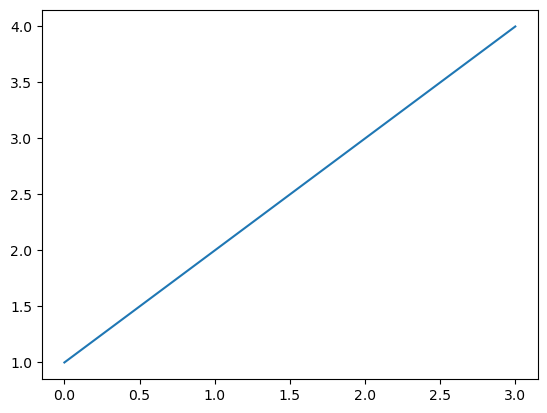

In [2]:
plt.plot([1, 2, 3, 4])

Full Batch Gradient descent

In [3]:
num_samples = 40
np.random.seed(45) 

# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps
print(x1.shape,y.shape)

(40,) (40,)


In [4]:
theta=torch.randn((2,1),requires_grad=True)

x=torch.tensor(x1,dtype=torch.float32).view(-1, 1)       #reshape is same as view
x=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
y =torch.tensor(y, dtype=torch.float32).view(-1, 1)
theta_hist=[]
loss_hist=[]
learning_rate=0.001
Epoch=0
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    y_pred=torch.matmul(x,theta)
    loss=torch.mean((y-y_pred)**2)
    loss_hist.append(loss.clone().detach().item())
    loss.backward()       # As soon as you alled the backward func in the loss it calculates the grad  of loss wrt defined var which has req_grad=True and stores in the defined var.grad
    with torch.no_grad():
        theta-=learning_rate*theta.grad
        theta.grad.zero_()
    
    # Print every 50 epochs
    if Epoch % 50 == 0:
        print(f"Step {Epoch}, Loss: {loss.item():.6f}, theta:\n{theta}")
        
    if(torch.norm(theta-theta_old)<0.001):
        break

print(Epoch) 
# print(loss_hist)

Step 50, Loss: 6.616351, theta:
tensor([[-1.5265],
        [99.9506]], requires_grad=True)
Step 100, Loss: 5.546674, theta:
tensor([[-1.2957],
        [99.9538]], requires_grad=True)
Step 150, Loss: 4.667069, theta:
tensor([[-1.0864],
        [99.9566]], requires_grad=True)
Step 200, Loss: 3.943712, theta:
tensor([[-0.8966],
        [99.9592]], requires_grad=True)
Step 250, Loss: 3.348880, theta:
tensor([[-0.7244],
        [99.9615]], requires_grad=True)
Step 300, Loss: 2.859732, theta:
tensor([[-0.5684],
        [99.9636]], requires_grad=True)
Step 350, Loss: 2.457500, theta:
tensor([[-0.4268],
        [99.9655]], requires_grad=True)
Step 400, Loss: 2.126721, theta:
tensor([[-0.2985],
        [99.9672]], requires_grad=True)
Step 450, Loss: 1.854705, theta:
tensor([[-0.1821],
        [99.9688]], requires_grad=True)
Step 500, Loss: 1.631018, theta:
tensor([[-7.6525e-02],
        [ 9.9970e+01]], requires_grad=True)
Step 550, Loss: 1.447117, theta:
tensor([[1.9188e-02],
        [9.9972e+0

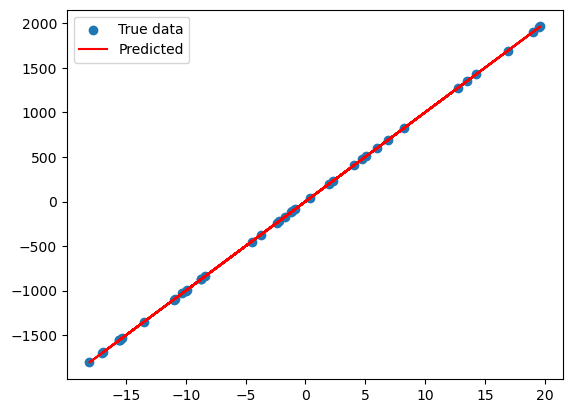

In [5]:
y_pred = x @ theta


plt.scatter(x[:,1].detach().numpy().reshape(-1, 1), y.detach().numpy(), label='True data')  # x[:,1] is original feature
plt.plot(x[:,1].detach().numpy().reshape(-1, 1), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

In [6]:
loss=torch.mean((y-x@theta)**2)
print(loss.item())

0.8499099016189575


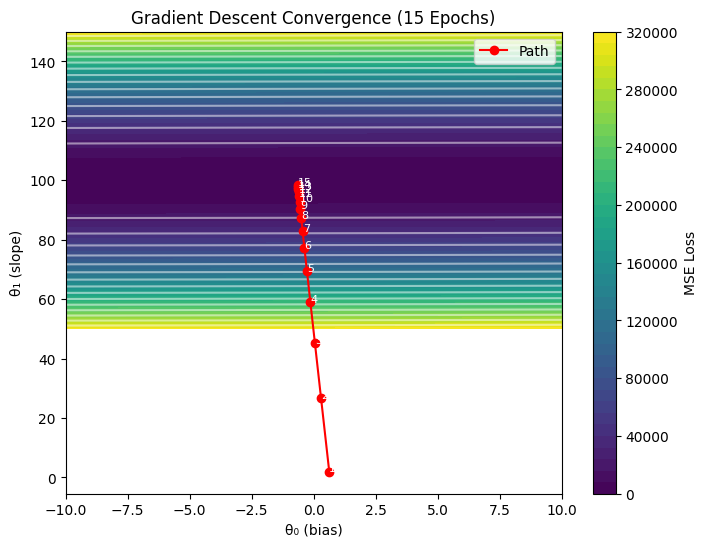

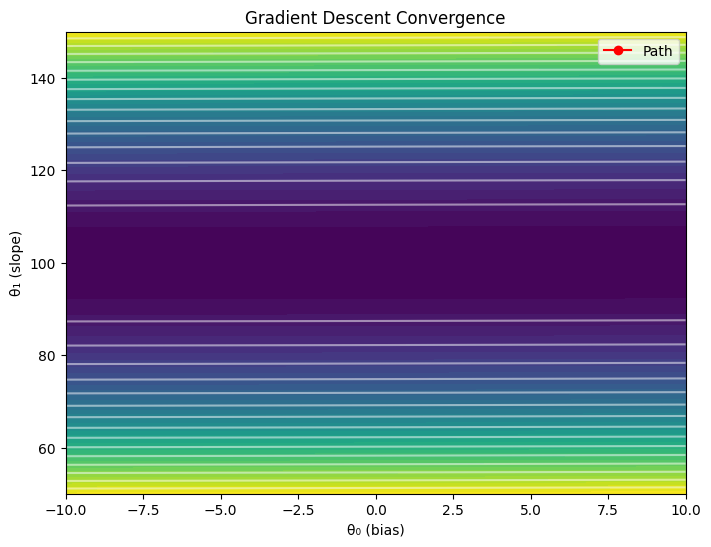

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def visualize_convergence(x, y, theta_hist, animate=False):
    """
    Visualize gradient descent convergence over the first 15 epochs.

    Parameters:
    - x : numpy array of shape (n_samples, 2)  # with bias column
    - y : numpy array of shape (n_samples, 1)
    - theta_hist : list/array of parameter vectors (θ0, θ1)
    - animate : bool, if True makes an animation, else static plot
    """

    # Take only first 15 steps
    theta_hist = np.array(theta_hist[:15])

    # Create parameter grid
    t0_vals = np.linspace(-10, 10, 200)
    t1_vals = np.linspace(50, 150, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    # Compute loss surface
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i, j], T1[i, j]])
            y_pred = x @ th.reshape(-1, 1)
            Z[i, j] = np.mean((y - y_pred) ** 2)

    if not animate:
        # Static contour plot
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        # Plot path
        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for i, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(i+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        # Animated version
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=500, blit=True)
        plt.show()
        return ani
# assuming you already have theta_hist, x, y
visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=False)  # static
# or
ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
# ani.save("gd_convergence_1.gif", writer="pillow")  # save GIF



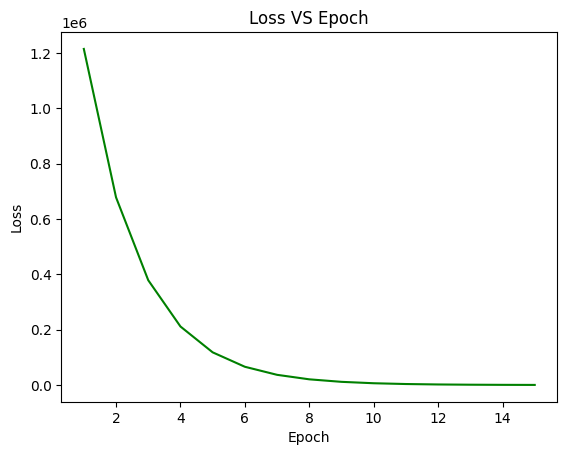

In [8]:
Epoch_hist=np.array([i for i in range(1,16)])
plt.plot(Epoch_hist,loss_hist[0:15],color='g')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.show()

In [9]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [10]:
theta=torch.randn((2,1),requires_grad=True)

x=torch.tensor(x1,dtype=torch.float32).view(-1, 1)
x=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
y =torch.tensor(y, dtype=torch.float32).view(-1, 1)
theta_hist=[]
loss_hist=[]
learning_rate=0.005
Epoch=0
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    y_pred=torch.matmul(x,theta)
    loss=torch.mean((y-y_pred)**2)
    loss_hist.append(loss.clone().detach().item())
    loss.backward()
    with torch.no_grad():
        theta-=learning_rate*theta.grad
        theta.grad.zero_()
        if(abs(theta_old[0]-theta[0])<0.001 and abs(theta_old[1]-theta[1])<0.001):
            break;
    print(f"Step {Epoch}, theta:\n", theta)
print(Epoch) 
print(loss_hist)

Step 1, theta:
 tensor([[ 0.4161],
        [-2.4324]], requires_grad=True)
Step 2, theta:
 tensor([[ 0.4472],
        [-2.4193]], requires_grad=True)
Step 3, theta:
 tensor([[ 0.4779],
        [-2.4061]], requires_grad=True)
Step 4, theta:
 tensor([[ 0.5083],
        [-2.3930]], requires_grad=True)
Step 5, theta:
 tensor([[ 0.5384],
        [-2.3799]], requires_grad=True)
Step 6, theta:
 tensor([[ 0.5682],
        [-2.3668]], requires_grad=True)
Step 7, theta:
 tensor([[ 0.5978],
        [-2.3537]], requires_grad=True)
Step 8, theta:
 tensor([[ 0.6271],
        [-2.3406]], requires_grad=True)
Step 9, theta:
 tensor([[ 0.6560],
        [-2.3276]], requires_grad=True)
Step 10, theta:
 tensor([[ 0.6847],
        [-2.3145]], requires_grad=True)
Step 11, theta:
 tensor([[ 0.7132],
        [-2.3015]], requires_grad=True)
Step 12, theta:
 tensor([[ 0.7413],
        [-2.2885]], requires_grad=True)
Step 13, theta:
 tensor([[ 0.7692],
        [-2.2755]], requires_grad=True)
Step 14, theta:
 tens

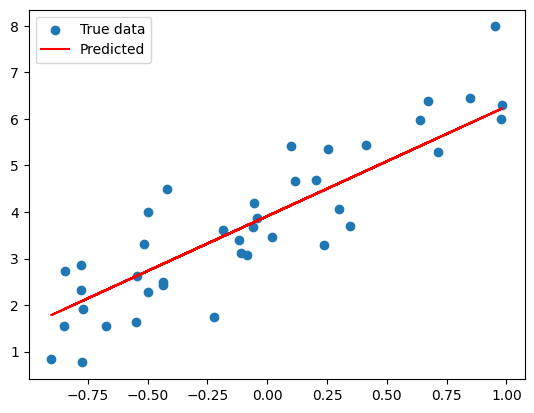

In [11]:
import matplotlib.pyplot as plt

y_pred = x @ theta

plt.scatter(x[:,1].numpy(), y.numpy(), label='True data')  # x[:,1] is original feature
plt.plot(x[:,1].numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

In [12]:
loss=torch.mean((y-x@theta)**2)
print(loss.item())

0.6287764310836792


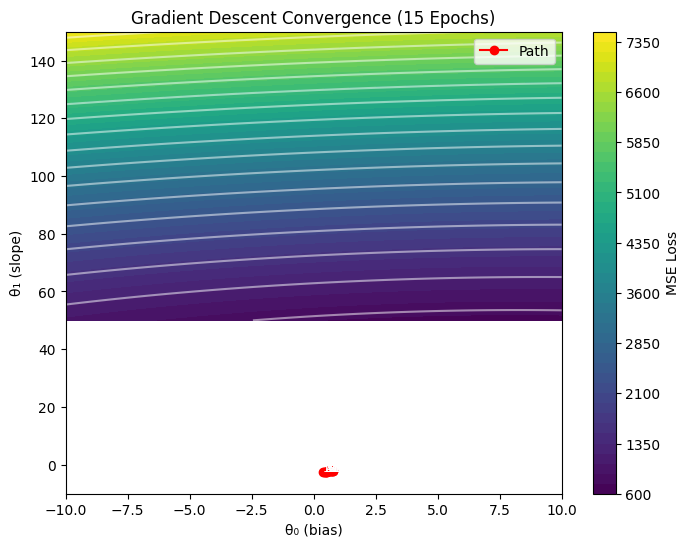

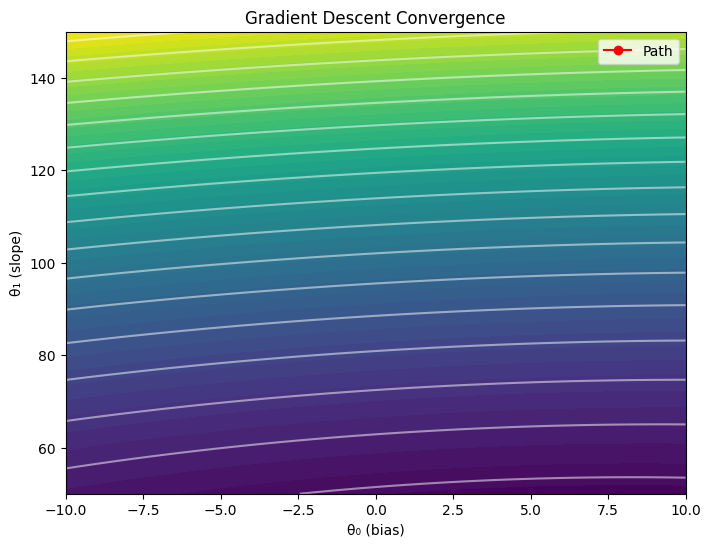

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def visualize_convergence(x, y, theta_hist, animate=False):
    """
    Visualize gradient descent convergence over the first 15 epochs.

    Parameters:
    - x : numpy array of shape (n_samples, 2)  # with bias column
    - y : numpy array of shape (n_samples, 1)
    - theta_hist : list/array of parameter vectors (θ0, θ1)
    - animate : bool, if True makes an animation, else static plot
    """

    # Take only first 15 steps
    theta_hist = np.array(theta_hist[:15])

    # Create parameter grid
    t0_vals = np.linspace(-10, 10, 200)
    t1_vals = np.linspace(50, 150, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    # Compute loss surface
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i, j], T1[i, j]])
            y_pred = x @ th.reshape(-1, 1)
            Z[i, j] = np.mean((y - y_pred) ** 2)

    if not animate:
        # Static contour plot
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        # Plot path
        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for i, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(i+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        # Animated version
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=500, blit=True)
        plt.show()
        return ani
# assuming you already have theta_hist, x, y
visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=False)  # static
# or
ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
#ani.save("gd_convergence_2.gif", writer="pillow")  # save GIF



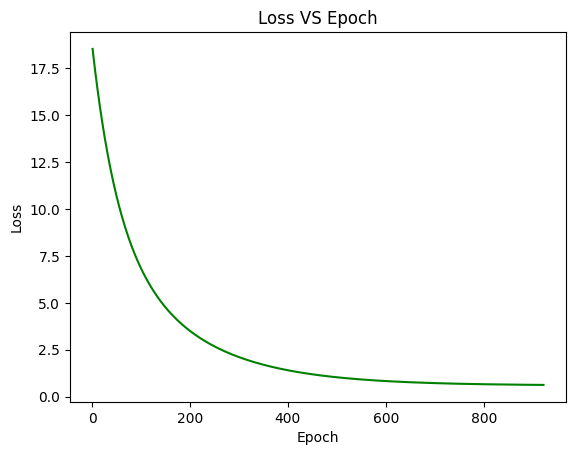

In [16]:
Epoch_hist=np.array([i for i in range(1,len(loss_hist)+1)])
plt.plot(Epoch_hist,loss_hist,color='g')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.show()

Socastic gradient Descent

In [17]:
num_samples = 40
np.random.seed(45) 
    
# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps
print(x1.shape,y.shape)

(40,) (40,)


In [18]:

theta=torch.randn((2,1),requires_grad=True)
y=torch.tensor(y,dtype=torch.float32).view(-1,1)
x=torch.tensor(x1,dtype=torch.float32).view(-1,1)
print("size:",y.shape,x.shape)
Epoch=0
theta_hist=[]
loss_hist=[]
learning_rate=0.005
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    for i in range(0,x.shape[0]):
        y_pred=theta[0]+theta[1]*(x[i])
        loss=(y[i]-y_pred)**2
        loss_hist.append(loss.clone().detach().item())
        loss.backward()
        with torch.no_grad():
            theta-=learning_rate*theta.grad
            theta.grad.zero_()
    if(abs(theta_old[0]-theta[0])<0.001 and abs(theta_old[1]-theta[1])<0.001):
            break;
    print(f"Epoch{Epoch}, theta:\n",theta)
print("Epoch:",Epoch)
        

size: torch.Size([40, 1]) torch.Size([40, 1])
Epoch1, theta:
 tensor([[ 11.8346],
        [100.2383]], requires_grad=True)
Epoch2, theta:
 tensor([[  6.5011],
        [100.1757]], requires_grad=True)
Epoch3, theta:
 tensor([[  3.7987],
        [100.1439]], requires_grad=True)
Epoch4, theta:
 tensor([[  2.4295],
        [100.1278]], requires_grad=True)
Epoch5, theta:
 tensor([[  1.7357],
        [100.1197]], requires_grad=True)
Epoch6, theta:
 tensor([[  1.3841],
        [100.1156]], requires_grad=True)
Epoch7, theta:
 tensor([[  1.2060],
        [100.1135]], requires_grad=True)
Epoch8, theta:
 tensor([[  1.1158],
        [100.1124]], requires_grad=True)
Epoch9, theta:
 tensor([[  1.0701],
        [100.1119]], requires_grad=True)
Epoch10, theta:
 tensor([[  1.0469],
        [100.1116]], requires_grad=True)
Epoch11, theta:
 tensor([[  1.0351],
        [100.1115]], requires_grad=True)
Epoch12, theta:
 tensor([[  1.0292],
        [100.1114]], requires_grad=True)
Epoch13, theta:
 tensor([[ 

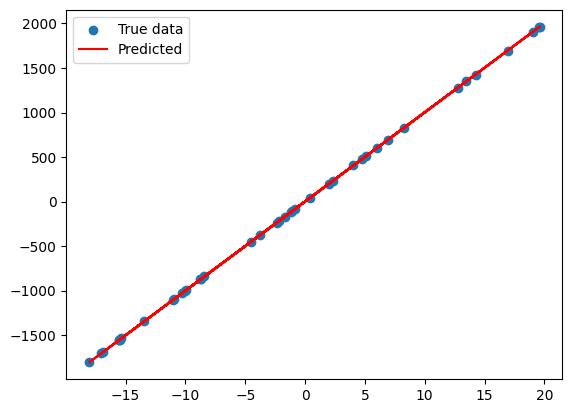

In [19]:
import matplotlib.pyplot as plt

y_pred = theta[0]+x*theta[1]

plt.scatter(x.numpy(), y.numpy(), label='True data') 
plt.plot(x.numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

In [20]:
loss=torch.mean((y-theta[0]-x*theta[1])**2)
print(loss.item())

2.614863872528076


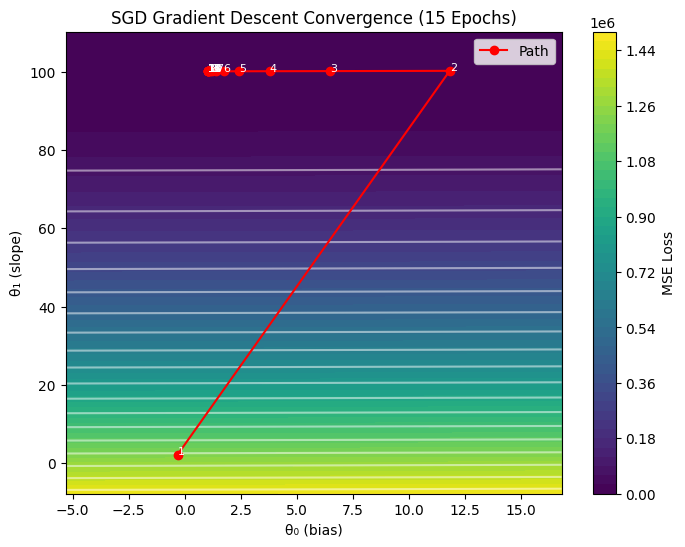

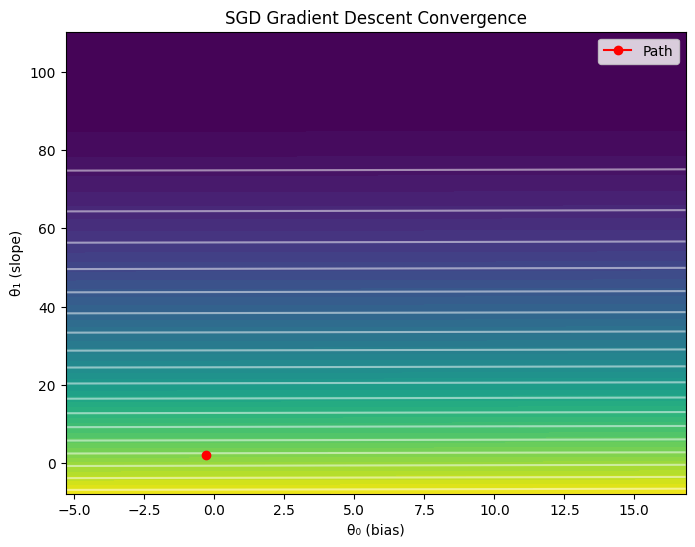

In [21]:
def visualize_convergence_sgd_1d(x, y, theta_hist, animate=False):
    theta_hist = np.array(theta_hist[:15 * len(x)])  # first 15 epochs

    # Flatten x to 1D if needed
    x = x.flatten()
    y = y.flatten()

    # Grid for contour
    t0_vals = np.linspace(np.min(theta_hist[:,0])-5, np.max(theta_hist[:,0])+5, 200)
    t1_vals = np.linspace(np.min(theta_hist[:,1])-10, np.max(theta_hist[:,1])+10, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i,j], T1[i,j]])
            y_pred = th[0] + th[1] * x
            Z[i,j] = np.mean((y - y_pred)**2)

    if not animate:
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for k, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(k+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("SGD Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("SGD Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=200, blit=True)
        plt.show()
        return ani
    # assuming you already have theta_hist, x, y
visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=False)  # ✅ static
# or
ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
#ani.save("gd_convergence_3.gif", writer="pillow")  # save GIF



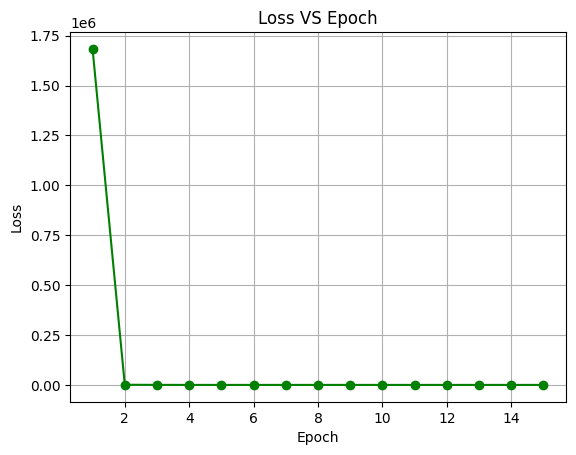

In [22]:
# Convert loss_hist to numpy
loss_hist = np.array(loss_hist)

# Number of samples per epoch
n_samples = 40

# Average loss per epoch
loss_per_epoch = [np.mean(loss_hist[i*n_samples:(i+1)*n_samples]) for i in range(int(len(loss_hist)/n_samples))]

# Epoch numbers
Epoch_hist = np.arange(1, len(loss_per_epoch)+1)

# Plot
plt.plot(Epoch_hist, loss_per_epoch, color='g', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.grid(True)
plt.show()


In [23]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [24]:

theta=torch.randn((2,1),requires_grad=True)
y=torch.tensor(y,dtype=torch.float32).view(-1,1)
x=torch.tensor(x1,dtype=torch.float32).view(-1,1)
print("size:",y.shape,x.shape)
Epoch=0
theta_hist=[]
loss_hist=[]
learning_rate=0.005
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    for i in range(0,x.shape[0]):
        y_pred=theta[0]+theta[1]*(x[i])
        loss=(y[i]-y_pred)**2
        loss_hist.append(loss.clone().detach().item())
        loss.backward()
        with torch.no_grad():
            theta-=learning_rate*theta.grad
            theta.grad.zero_()
    if(abs(theta_old[0]-theta[0])<0.001 and abs(theta_old[1]-theta[1])<0.001):
            break;
    print(f"Epoch{Epoch}, theta:\n",theta)
print("Epoch:",Epoch)
        

size: torch.Size([40, 1]) torch.Size([40, 1])
Epoch1, theta:
 tensor([[ 0.8235],
        [-0.1703]], requires_grad=True)
Epoch2, theta:
 tensor([[1.7849],
        [0.0912]], requires_grad=True)
Epoch3, theta:
 tensor([[2.4352],
        [0.3456]], requires_grad=True)
Epoch4, theta:
 tensor([[2.8773],
        [0.5860]], requires_grad=True)
Epoch5, theta:
 tensor([[3.1796],
        [0.8089]], requires_grad=True)
Epoch6, theta:
 tensor([[3.3880],
        [1.0127]], requires_grad=True)
Epoch7, theta:
 tensor([[3.5330],
        [1.1976]], requires_grad=True)
Epoch8, theta:
 tensor([[3.6351],
        [1.3640]], requires_grad=True)
Epoch9, theta:
 tensor([[3.7080],
        [1.5132]], requires_grad=True)
Epoch10, theta:
 tensor([[3.7608],
        [1.6464]], requires_grad=True)
Epoch11, theta:
 tensor([[3.7998],
        [1.7651]], requires_grad=True)
Epoch12, theta:
 tensor([[3.8292],
        [1.8706]], requires_grad=True)
Epoch13, theta:
 tensor([[3.8517],
        [1.9643]], requires_grad=True)

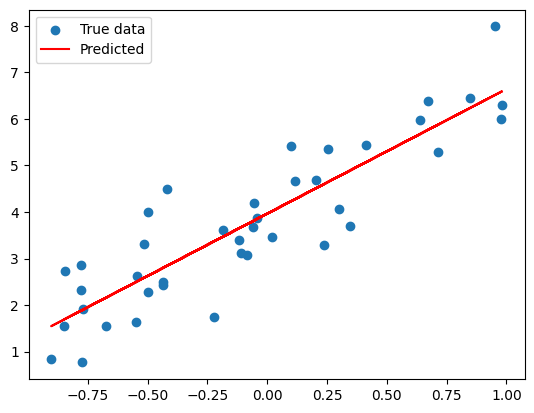

In [25]:
import matplotlib.pyplot as plt

y_pred = theta[0]+x*theta[1]

plt.scatter(x.numpy(), y.numpy(), label='True data') 
plt.plot(x.numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

In [26]:
loss=torch.mean((y-theta[0]-x*theta[1])**2)
print(loss.item())

0.5959485173225403


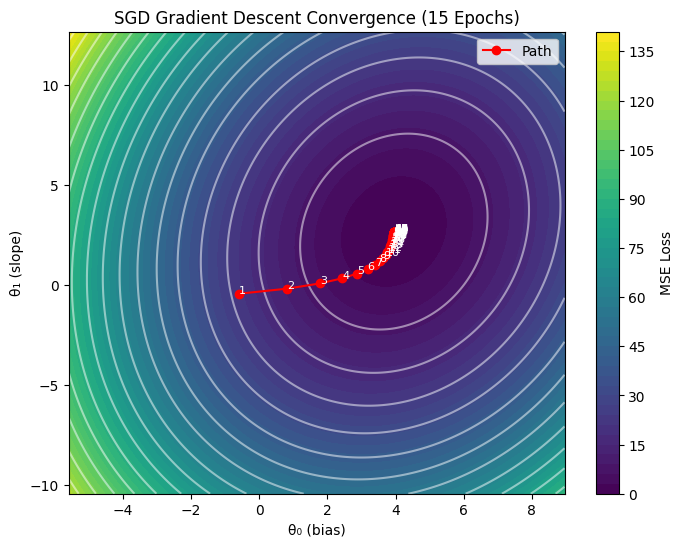

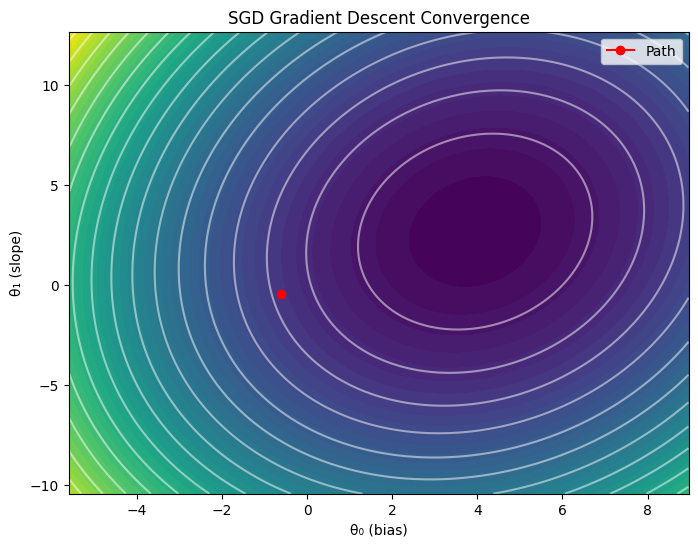

In [27]:
def visualize_convergence_sgd_1d(x, y, theta_hist, animate=False):
    theta_hist = np.array(theta_hist[:15 * len(x)])  # first 15 epochs

    # Flatten x to 1D if needed
    x = x.flatten()
    y = y.flatten()

    # Grid for contour
    t0_vals = np.linspace(np.min(theta_hist[:,0])-5, np.max(theta_hist[:,0])+5, 200)
    t1_vals = np.linspace(np.min(theta_hist[:,1])-10, np.max(theta_hist[:,1])+10, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i,j], T1[i,j]])
            y_pred = th[0] + th[1] * x
            Z[i,j] = np.mean((y - y_pred)**2)

    if not animate:
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for k, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(k+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("SGD Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("SGD Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=200, blit=True)
        plt.show()
        return ani
    # assuming you already have theta_hist, x, y
visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=False)  # ✅ static
# or
ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
#ani.save("gd_convergence_4.gif", writer="pillow")  # save GIF



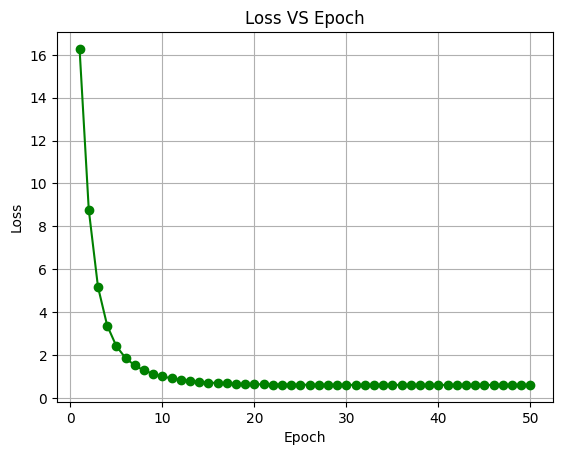

In [28]:
# Convert loss_hist to numpy
loss_hist = np.array(loss_hist)

# Number of samples per epoch
n_samples = 40

# Average loss per epoch
loss_per_epoch = [np.mean(loss_hist[i*n_samples:(i+1)*n_samples]) for i in range(int(len(loss_hist)/n_samples))]

# Epoch numbers
Epoch_hist = np.arange(1, len(loss_per_epoch)+1)

# Plot
plt.plot(Epoch_hist, loss_per_epoch, color='g', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.grid(True)
plt.show()
